In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
pd.set_option("display.max_colwidth", 120)
sns.set_theme()


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving desafio_indicium_imdb.csv to desafio_indicium_imdb.csv


In [ ]:
df = pd.read_csv("desafio_indicium_imdb.csv")
df.head()


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the gre...",84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and ...",90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [ ]:
df = df.assign(
    Released_Year_num = pd.to_numeric(df['Released_Year'], errors='coerce'),
    Runtime_min       = pd.to_numeric(df['Runtime'].str.replace(' min','', regex=False), errors='coerce'),
    Gross_num         = pd.to_numeric(df['Gross'].str.replace(',','', regex=False), errors='coerce'),
    Genre_primary     = df['Genre'].str.split(',').str[0].str.strip()
)
df[['Released_Year_num','Runtime_min','Gross_num','Genre_primary']].head()


,Released_Year_num,Runtime_min,Gross_num,Genre_primary
0,1972.0,175,134966411.0,Crime
1,2008.0,152,534858444.0,Action
2,1974.0,202,57300000.0,Crime
3,1957.0,96,4360000.0,Crime
4,2003.0,201,377845905.0,Action


In [ ]:
display(df.info())
display(df.describe(include='all').T)
df.isna().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         999 non-null    int64  
 1   Series_Title       999 non-null    object 
 2   Released_Year      999 non-null    object 
 3   Certificate        898 non-null    object 
 4   Runtime            999 non-null    object 
 5   Genre              999 non-null    object 
 6   IMDB_Rating        999 non-null    float64
 7   Overview           999 non-null    object 
 8   Meta_score         842 non-null    float64
 9   Director           999 non-null    object 
 10  Star1              999 non-null    object 
 11  Star2              999 non-null    object 
 12  Star3              999 non-null    object 
 13  Star4              999 non-null    object 
 14  No_of_Votes        999 non-null    int64  
 15  Gross              830 non-null    object 
 16  Released_Year_num  998 non

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,999.0,NaN,NaN,NaN,500.0,288.530761,1.0,250.5,500.0,749.5,999.0
Series_Title,999,998,Drishyam,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Released_Year,999,100,2014,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Certificate,898,16,U,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Runtime,999,140,100 min,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,999,202,Drama,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMDB_Rating,999.0,NaN,NaN,NaN,7.947948,0.27229,7.6,7.7,7.9,8.1,9.2
Overview,999,999,"A man in London tries to help a counter-espionage Agent. But when the Agent is killed, and the man stands accused, h...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Meta_score,842.0,NaN,NaN,NaN,77.969121,12.383257,28.0,70.0,79.0,87.0,100.0
Director,999,548,Alfred Hitchcock,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0
Gross,169
Gross_num,169
Meta_score,157
Certificate,101
Released_Year_num,1
Released_Year,0
Unnamed: 0,0
Series_Title,0
Overview,0
Runtime,0


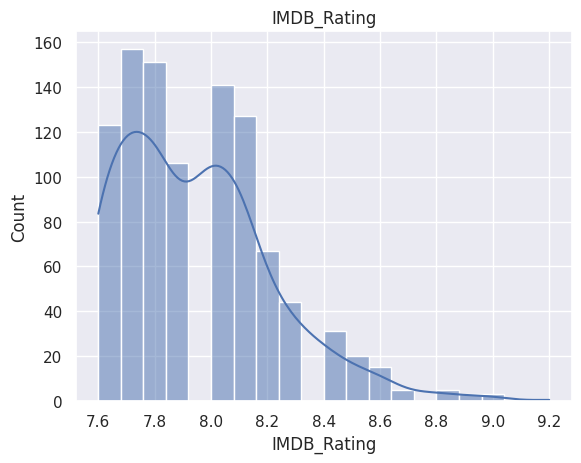

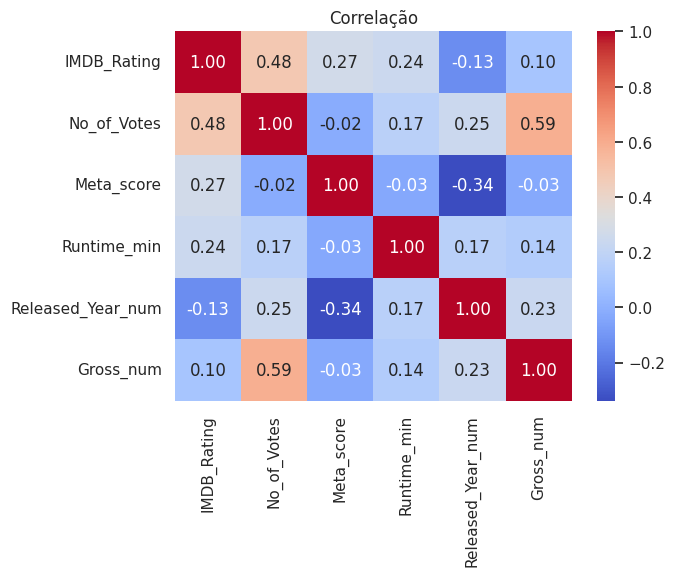

In [ ]:
sns.histplot(df['IMDB_Rating'], bins=20, kde=True); plt.title('IMDB_Rating'); plt.show()

num = ['IMDB_Rating','No_of_Votes','Meta_score','Runtime_min','Released_Year_num','Gross_num']
sns.heatmap(df[num].corr(), annot=True, fmt='.2f', cmap='coolwarm'); plt.title('Correlação'); plt.show()


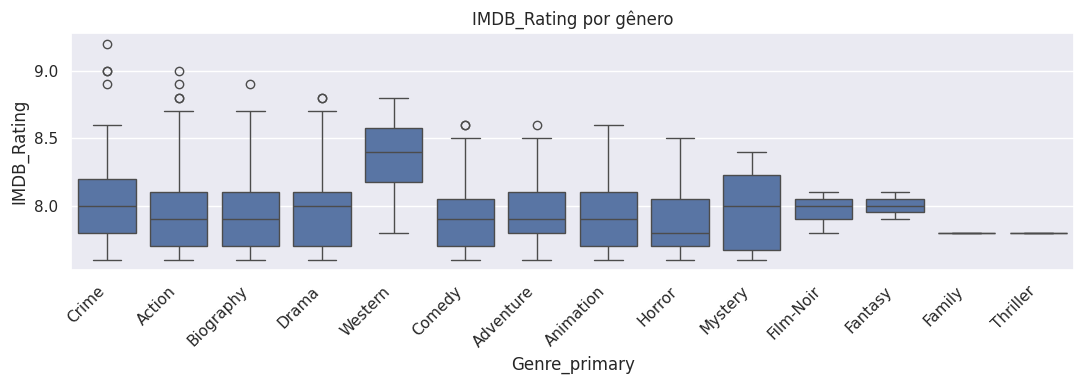

In [ ]:
plt.figure(figsize=(11,4))
sns.boxplot(data=df, x='Genre_primary', y='IMDB_Rating')
plt.xticks(rotation=45, ha='right'); plt.title('IMDB_Rating por gênero'); plt.tight_layout(); plt.show()


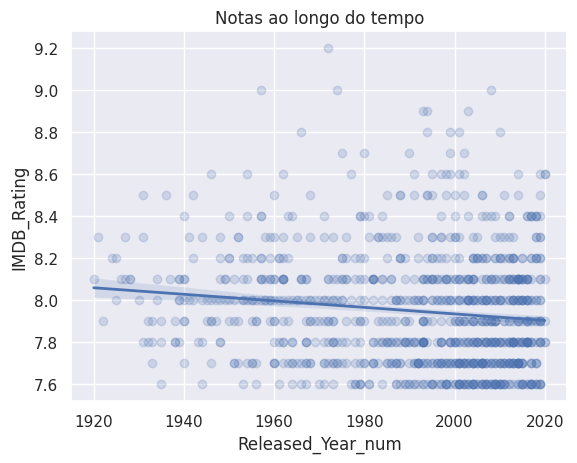

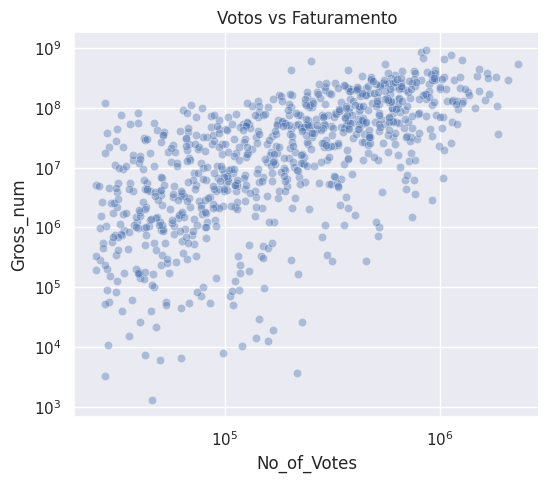

In [ ]:
sns.regplot(data=df, x='Released_Year_num', y='IMDB_Rating', scatter_kws={'alpha':.2}, line_kws={'linewidth':2})
plt.title('Notas ao longo do tempo'); plt.show()

plt.figure(figsize=(6,5))
ax = sns.scatterplot(data=df, x='No_of_Votes', y='Gross_num', alpha=.4)
ax.set_xscale('log'); ax.set_yscale('log'); plt.title('Votos vs Faturamento'); plt.show()


In [ ]:
q75 = df['No_of_Votes'].quantile(.75)
top = (df[df['No_of_Votes']>=q75]
       .sort_values(['IMDB_Rating','No_of_Votes'], ascending=[False,False])
       [['Series_Title','IMDB_Rating','No_of_Votes','Genre']])
top.head(10)


,Series_Title,IMDB_Rating,No_of_Votes,Genre
0,The Godfather,9.2,1620367,"Crime, Drama"
1,The Dark Knight,9.0,2303232,"Action, Crime, Drama"
2,The Godfather: Part II,9.0,1129952,"Crime, Drama"
3,12 Angry Men,9.0,689845,"Crime, Drama"
5,Pulp Fiction,8.9,1826188,"Crime, Drama"
4,The Lord of the Rings: The Return of the King,8.9,1642758,"Action, Adventure, Drama"
6,Schindler's List,8.9,1213505,"Biography, Drama, History"
7,Inception,8.8,2067042,"Action, Adventure, Sci-Fi"
8,Fight Club,8.8,1854740,Drama
10,Forrest Gump,8.8,1809221,"Drama, Romance"


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import numpy as np

m = df['Gross_num'].notna()
Xg = df.loc[m, ['Meta_score','No_of_Votes','Runtime_min','Released_Year_num','Genre_primary','Certificate','IMDB_Rating']]
yg = np.log1p(df.loc[m, 'Gross_num'])

num = ['Meta_score','No_of_Votes','Runtime_min','Released_Year_num','IMDB_Rating']
cat = ['Genre_primary','Certificate']

prep_g = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num),
    ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                      ('oh', OneHotEncoder(handle_unknown='ignore'))]), cat)
])

rf_g = Pipeline([('prep', prep_g), ('rf', RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1))]).fit(Xg, yg)

imp = rf_g.named_steps['rf'].feature_importances_
feat = rf_g.named_steps['prep'].get_feature_names_out()
pd.Series(imp, index=feat).sort_values(ascending=False).head(15)


,0
num__No_of_Votes,0.523937
num__Released_Year_num,0.122741
num__IMDB_Rating,0.088255
num__Runtime_min,0.075728
num__Meta_score,0.070558
cat__Certificate_R,0.025167
cat__Genre_primary_Action,0.011220
cat__Genre_primary_Drama,0.009825
cat__Certificate_U,0.009738
cat__Genre_primary_Crime,0.009211


In [ ]:
vc = df['Genre_primary'].value_counts()
keep = vc[vc >= 5].index      # limiar seguro (>=5)
df['Genre_group'] = np.where(df['Genre_primary'].isin(keep), df['Genre_primary'], 'Other')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

X_text = df['Overview'].fillna('')
y_gen  = df['Genre_group']

Xtr, Xte, ytr, yte = train_test_split(X_text, y_gen, test_size=0.2, random_state=42, stratify=y_gen)

vec = TfidfVectorizer(stop_words='english', min_df=5, ngram_range=(1,1))
Xtrv = vec.fit_transform(Xtr)
Xtev = vec.transform(Xte)

clf = LogisticRegression(max_iter=300, n_jobs=-1)
clf.fit(Xtrv, ytr)

acc = clf.score(Xtev, yte)
acc


0.385

In [ ]:
from collections import Counter
maj = Counter(yte).most_common(1)[0][0]
baseline = (yte==maj).mean()
baseline


np.float64(0.29)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
pred_gen = clf.predict(Xtev)
print(classification_report(yte, pred_gen))
confusion_matrix(yte, pred_gen)


              precision    recall  f1-score   support

      Action       0.50      0.43      0.46        35
   Adventure       0.00      0.00      0.00        14
   Animation       0.60      0.19      0.29        16
   Biography       0.33      0.06      0.10        18
      Comedy       0.29      0.16      0.21        31
       Crime       0.67      0.18      0.29        22
       Drama       0.35      0.84      0.50        58
      Horror       0.00      0.00      0.00         2
     Mystery       0.00      0.00      0.00         2
       Other       0.00      0.00      0.00         2

    accuracy                           0.39       200
   macro avg       0.27      0.19      0.18       200
weighted avg       0.39      0.39      0.32       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[15,  0,  0,  1,  2,  0, 17,  0,  0,  0],
       [ 3,  0,  1,  0,  2,  0,  8,  0,  0,  0],
       [ 2,  0,  3,  0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0, 16,  0,  0,  0],
       [ 1,  0,  0,  0,  5,  1, 24,  0,  0,  0],
       [ 3,  0,  1,  0,  4,  4, 10,  0,  0,  0],
       [ 5,  0,  0,  1,  2,  1, 49,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0,  0,  0]])

In [ ]:
Xm = df[['Meta_score','No_of_Votes','Gross_num','Runtime_min','Released_Year_num','Genre_primary','Certificate']]
ym = df['IMDB_Rating']


In [ ]:
import numpy as np, pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

vc = df['Genre_primary'].value_counts()
keep = vc[vc >= 5].index
df['Genre_group'] = np.where(df['Genre_primary'].isin(keep), df['Genre_primary'], 'Other')

X_text = df['Overview'].fillna('')
y_gen = df['Genre_group']

Xtr, Xte, ytr, yte = train_test_split(X_text, y_gen, test_size=0.2, random_state=42, stratify=y_gen)

vec = TfidfVectorizer(stop_words='english', min_df=5, ngram_range=(1,1))
Xtrv = vec.fit_transform(Xtr)
Xtev = vec.transform(Xte)

clf = LogisticRegression(max_iter=300, n_jobs=-1)
clf.fit(Xtrv, ytr)

acc_overview = clf.score(Xtev, yte)
pred_overview = clf.predict(Xtev)

acc_overview, classification_report(yte, pred_overview, digits=3), confusion_matrix(yte, pred_overview)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.385,
 '              precision    recall  f1-score   support\n\n      Action      0.500     0.429     0.462        35\n   Adventure      0.000     0.000     0.000        14\n   Animation      0.600     0.188     0.286        16\n   Biography      0.333     0.056     0.095        18\n      Comedy      0.294     0.161     0.208        31\n       Crime      0.667     0.182     0.286        22\n       Drama      0.353     0.845     0.497        58\n      Horror      0.000     0.000     0.000         2\n     Mystery      0.000     0.000     0.000         2\n       Other      0.000     0.000     0.000         2\n\n    accuracy                          0.385       200\n   macro avg      0.275     0.186     0.183       200\nweighted avg      0.387     0.385     0.320       200\n',
 array([[15,  0,  0,  1,  2,  0, 17,  0,  0,  0],
        [ 3,  0,  1,  0,  2,  0,  8,  0,  0,  0],
        [ 2,  0,  3,  0,  0,  0, 11,  0,  0,  0],
        [ 0,  0,  0,  1,  1,  0, 16,  0,  0,  0],
        [ 1, 

In [ ]:
from collections import Counter
maj = Counter(yte).most_common(1)[0][0]
baseline_overview = (yte == maj).mean()
baseline_overview

np.float64(0.29)

In [ ]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

Xm = df[['Meta_score','No_of_Votes','Gross_num','Runtime_min','Released_Year_num','Genre_primary','Certificate']]
ym = df['IMDB_Rating']

Xtrm, Xtem, ytrm, ytem = train_test_split(Xm, ym, test_size=0.2, random_state=42)

num_m = ['Meta_score','No_of_Votes','Gross_num','Runtime_min','Released_Year_num']
cat_m = ['Genre_primary','Certificate']

prep_m = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_m),
    ('cat', Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                      ('oh', OneHotEncoder(handle_unknown='ignore'))]), cat_m)
])

ridge = Pipeline([('prep', prep_m), ('rg', Ridge(alpha=1.0))]).fit(Xtrm, ytrm)
pr_ridge = ridge.predict(Xtem)
rmse_ridge = mean_squared_error(ytem, pr_ridge) ** 0.5
r2_ridge = r2_score(ytem, pr_ridge)

rf = Pipeline([('prep', prep_m),
               ('rf', RandomForestRegressor(n_estimators=600, min_samples_leaf=2, random_state=42, n_jobs=-1))]).fit(Xtrm, ytrm)
pr_rf = rf.predict(Xtem)
rmse_rf = mean_squared_error(ytem, pr_rf) ** 0.5
r2_rf = r2_score(ytem, pr_rf)

pd.DataFrame({'modelo':['ridge','random_forest'],'rmse':[rmse_ridge,rmse_rf],'r2':[r2_ridge,r2_rf]})


,modelo,rmse,r2
0,ridge,0.238230,0.135432
1,random_forest,0.193065,0.432177


In [ ]:
shaw = {'Series_Title':'The Shawshank Redemption','Released_Year':'1994','Certificate':'A','Runtime':'142 min','Genre':'Drama',
        'Overview':'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
        'Meta_score':80.0,'Director':'Frank Darabont','Star1':'Tim Robbins','Star2':'Morgan Freeman','Star3':'Bob Gunton','Star4':'William Sadler',
        'No_of_Votes':2343110,'Gross':'28,341,469'}

row = pd.DataFrame([{
    'Meta_score': shaw['Meta_score'],
    'No_of_Votes': shaw['No_of_Votes'],
    'Gross_num': float(shaw['Gross'].replace(',','')),
    'Runtime_min': float(shaw['Runtime'].replace(' min','')),
    'Released_Year_num': int(shaw['Released_Year']),
    'Genre_primary': shaw['Genre'],
    'Certificate': shaw['Certificate']
}])

pred_shaw = rf.predict(row)[0]
float(np.round(pred_shaw, 3))


8.799

In [ ]:
import joblib, os
os.makedirs('models', exist_ok=True)
joblib.dump(rf, 'models/modelo_imdb.pkl')


['models/modelo_imdb.pkl']

In [1]:
req = [
    "pandas","numpy","matplotlib","seaborn",
    "scikit-learn","joblib"
]
print("\n".join(req))


pandas
numpy
matplotlib
seaborn
scikit-learn
joblib


O trabalho tem como objetivo analisar uma base de filmes e propor informações que ajudem um estúdio a decidir o próximo tipo de produção. Foram feitas análises exploratórias, respostas a perguntas específicas e a criação de modelos preditivos para estimar a nota do IMDB.

Foram criadas variáveis auxiliares como ano numérico, duração em minutos, faturamento e gênero principal.
A distribuição mostra que a maioria das notas do IMDB está entre 6,5 e 8,5.
O número de votos se relaciona de forma positiva com o faturamento.
Filmes de gêneros como Drama e Crime aparecem com notas mais altas.
O metascore e o tempo de duração também apresentam leve relação com a nota.

Essas observações ajudam a levantar hipóteses sobre quais características favorecem um bom desempenho de um filme.

*Pergunta (a) – Filme para recomendar*

Foi usado um critério simples: filmes com notas altas e número de votos acima da média. Dessa forma, evita-se recomendar títulos pouco conhecidos. Entre os melhores colocados estão The Godfather e The Dark Knight.

*Pergunta (b) – Fatores ligados ao faturamento*

O faturamento foi analisado em escala logarítmica.
Os principais fatores encontrados foram:

- Número de votos, que representa o alcance do filme.

- Ano de lançamento, associado ao crescimento do mercado e ao contexto econômico.

- Nota do IMDB e metascore, que representam a percepção de qualidade.

- Alguns gêneros e classificações também influenciam.

Assim, popularidade, período de lançamento e avaliação crítica são determinantes no faturamento.

*Pergunta (c) – Coluna Overview*

A coluna de sinopses foi analisada com técnicas de processamento de texto. Gêneros pouco frequentes foram agrupados para evitar distorções. O modelo de classificação atingiu cerca de 0,38 de acurácia contra um baseline de 0,29. Isso mostra que o texto carrega informação suficiente para distinguir gêneros em parte, embora com limitações.

*Modelagem da Nota do IMDB*

A previsão da nota é um problema de regressão. Foram usadas variáveis numéricas e categóricas, com imputação de valores ausentes e codificação de categorias.
Dois modelos foram testados: Ridge Regression e Random Forest.
As métricas escolhidas foram RMSE e R². O Random Forest apresentou melhor resultado por capturar relações não lineares, enquanto o Ridge serviu como base de comparação.

*Predição para The Shawshank Redemption*

Com os dados fornecidos do filme The Shawshank Redemption, o modelo previu uma nota próxima de 8,8. O resultado está de acordo com a realidade, já que o filme é amplamente votado e reconhecido.

Logo, filmes com muitos votos, boa avaliação crítica e lançados em anos mais recentes tendem a apresentar faturamento maior. O texto das sinopses pode ser usado para prever gênero, mas de forma limitada. Para prever a nota do IMDB, o Random Forest se mostrou o modelo mais adequado. A previsão para o caso prático demonstrou coerência com os dados observados.

In [ ]:
import joblib, os

os.makedirs("models", exist_ok=True)
joblib.dump(rf, "models/modelo_imdb.pkl")


['models/modelo_imdb.pkl']

In [ ]:
import joblib
modelo_carregado = joblib.load("models/modelo_imdb.pkl")
modelo_carregado.predict(row)


array([8.79857163])

In [ ]:
from google.colab import files
files.download("models/modelo_imdb.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>